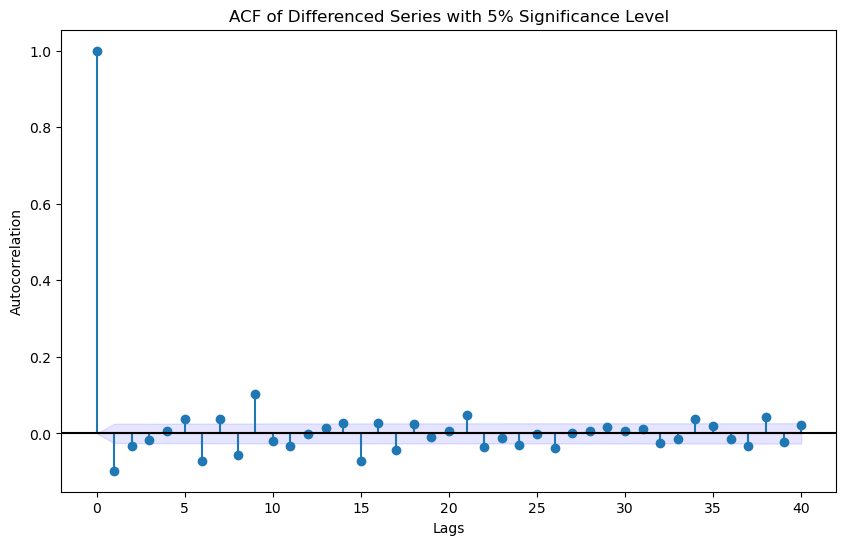

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your dataset
data = pd.read_csv('C:/Users/onurs/Downloads/MSFT.csv')

# Extract the 'Close' column as the time series
time_series = data['Close']

# First differencing of the time series
diff_time_series = time_series.diff().dropna()

# Calculate ACF values using statsmodels
acf_values, confint = sm.tsa.acf(diff_time_series, nlags=40, alpha=0.05)

# Number of lags
num_lags = len(acf_values)

# Plot ACF values with confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(range(num_lags), acf_values)

# Plot the confidence intervals
confint_lower = confint[:, 0] - acf_values
confint_upper = confint[:, 1] - acf_values
ax.fill_between(range(num_lags), confint_lower, confint_upper, color='blue', alpha=0.1)

ax.axhline(y=0, linestyle='-', color='black')
ax.set_title('ACF of Differenced Series with 5% Significance Level')
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation')
plt.show()


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load your dataset
data = pd.read_csv('C:/Users/onurs/Downloads/MSFT.csv')

# Extract the 'Close' column as the time series
time_series = data['Close']

# First differencing of the time series
diff_time_series = time_series.diff().dropna()

# Define the range for p, d, q parameters
p = q = range(0, 4)
d = 1

# Generate all different combinations of p, d and q triplets
pdq = [(x, d, z) for x in p for z in q]

# Run grid search to find the best ARIMA model
best_aic = np.inf
best_order = None
best_model = None

for order in pdq:
    try:
        model = sm.tsa.arima.ARIMA(time_series, order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
            best_model = model_fit
    except:
        continue

print(f'Best ARIMA model order: {best_order} with AIC: {best_aic}')


Best ARIMA model order: (3, 1, 2) with AIC: 26530.870160900937


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6038
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -13259.435
Date:                Mon, 27 May 2024   AIC                          26530.870
Time:                        17:06:45   BIC                          26571.104
Sample:                             0   HQIC                         26544.838
                               - 6038                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0326      0.016      2.012      0.044       0.001       0.064
ar.L2         -0.8963      0.013    -69.287      0.000      -0.922      -0.871
ar.L3         -0.1118      0.005    -21.494      0.0

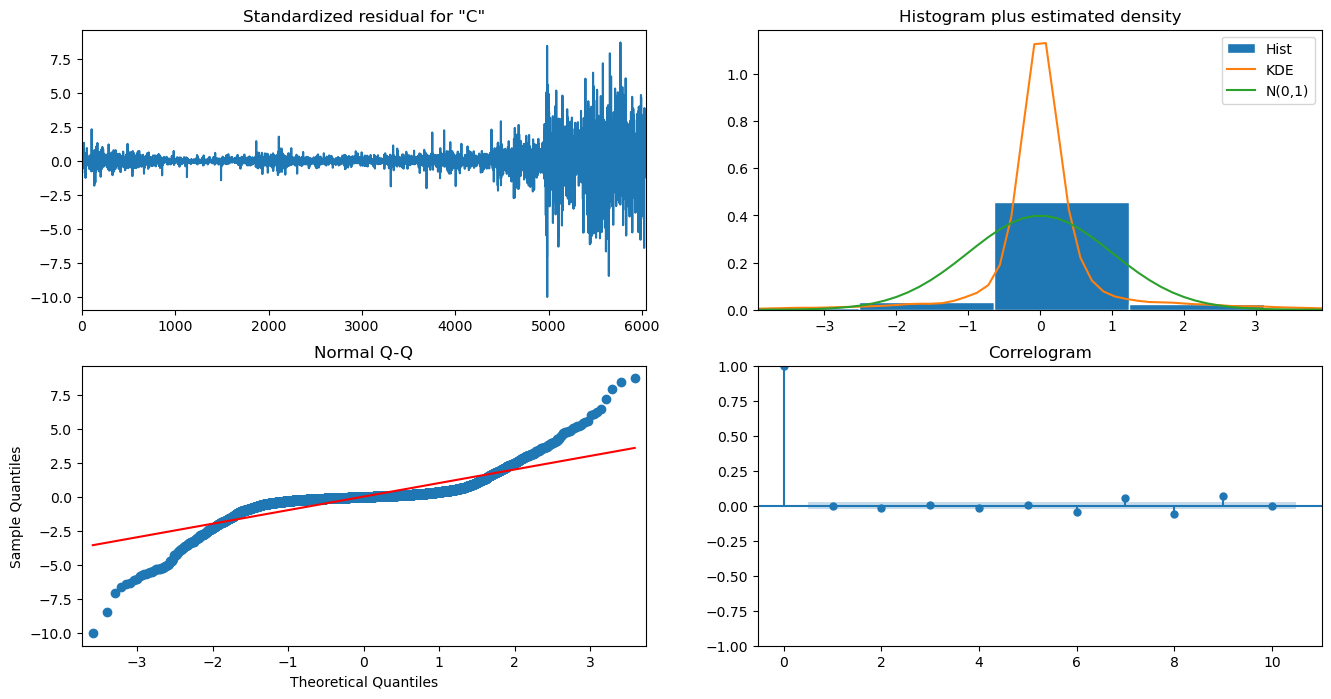

In [5]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset
data = pd.read_csv('C:/Users/onurs/Downloads/MSFT.csv')

# Extract the 'Close' column as the time series
time_series = data['Close']

# Fit the ARIMA(3, 1, 2) model
model = sm.tsa.arima.ARIMA(time_series, order=(3, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()
